In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# Install Geopandas Library

!pip install geopandas

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 10.9MB 16.7MB/s 
     |████████████████████████████████| 14.7MB 250kB/s 


In [3]:
'''
Import all modules that are needed
'''
import pandas as pd
import geopandas as gpd
import fiona
import pickle
import matplotlib.pyplot as plt
import pandas_profiling 
import numpy as np
import seaborn as sns
from plotnine import *


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# Import final rollup file

rollup_prodhead_final = pd.read_pickle('/content/drive/My Drive/Capstone1/Production/rollup_prodhead_final.pickle')
rollup_prodhead_final.info()

rollup_prodhead_final.head(5)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49280 entries, 0 to 49279
Data columns (total 66 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   API                           49280 non-null  int64          
 1   API8                          49280 non-null  int64          
 2   API_County                    49280 non-null  int64          
 3   well_type_cat                 49280 non-null  category       
 4   well_type_cat2                49280 non-null  category       
 5   Oper_Cur_Num                  49280 non-null  int64          
 6   Oper_Cur_Name                 49280 non-null  category       
 7   Oper_Hist_Num                 49280 non-null  int64          
 8   Oper_Hist_Name                49280 non-null  category       
 9   Field_Code                    49280 non-null  float64        
 10  Field_Name                    49280 non-null  category       
 11  UTM_X_SF       

API    API8  ...  CODL_Hor_IP_Quintile CODL_Hor_NormBoeCum_Quintile
0  10502900  105029  ...                   NaN                          NaN
1  10504400  105044  ...                   NaN                          NaN
2  10507000  105070  ...                   NaN                          NaN
3  10524200  105242  ...                   NaN                          NaN
4  10526300  105263  ...                   NaN                          NaN

[5 rows x 66 columns]

In [0]:
# QC AB_VAL
rollup_prodhead_final.loc[(rollup_prodhead_final['Ab_Val'] == 1) & (rollup_prodhead_final['well_type_cat2'] == 'Horizontal') & (rollup_prodhead_final['fm_code_realloc'] == 'NBRR')]


In [0]:
# Well to exclude?
excluded_wells = rollup_prodhead_final['API'].loc[(rollup_prodhead_final['Facil_Stat'] == 'IJ')]#& (rollup_prodhead_final['boe_cum'] > 0)].count() #& (rollup_prodhead_final['fm_code_realloc'] == 'NBRR')]
excluded_wells.head()
excluded_wells.to_csv("/content/drive/My Drive/Capstone1/Production/excluded_wells.csv")


In [0]:
# Generate an html report with  pandas profiling; this is the final pass with form code properly accounted for and further cleaning

pandas_profiling.ProfileReport(rollup_prodhead_final)


In [77]:
import matplotlib
colorname = []
colorid = []
for name, hex in matplotlib.colors.cnames.items():
    colorname.append(name)
    colorid.append(hex)

print(list(zip(colorname, colorid)))

[('aliceblue', '#F0F8FF'), ('antiquewhite', '#FAEBD7'), ('aqua', '#00FFFF'), ('aquamarine', '#7FFFD4'), ('azure', '#F0FFFF'), ('beige', '#F5F5DC'), ('bisque', '#FFE4C4'), ('black', '#000000'), ('blanchedalmond', '#FFEBCD'), ('blue', '#0000FF'), ('blueviolet', '#8A2BE2'), ('brown', '#A52A2A'), ('burlywood', '#DEB887'), ('cadetblue', '#5F9EA0'), ('chartreuse', '#7FFF00'), ('chocolate', '#D2691E'), ('coral', '#FF7F50'), ('cornflowerblue', '#6495ED'), ('cornsilk', '#FFF8DC'), ('crimson', '#DC143C'), ('cyan', '#00FFFF'), ('darkblue', '#00008B'), ('darkcyan', '#008B8B'), ('darkgoldenrod', '#B8860B'), ('darkgray', '#A9A9A9'), ('darkgreen', '#006400'), ('darkgrey', '#A9A9A9'), ('darkkhaki', '#BDB76B'), ('darkmagenta', '#8B008B'), ('darkolivegreen', '#556B2F'), ('darkorange', '#FF8C00'), ('darkorchid', '#9932CC'), ('darkred', '#8B0000'), ('darksalmon', '#E9967A'), ('darkseagreen', '#8FBC8F'), ('darkslateblue', '#483D8B'), ('darkslategray', '#2F4F4F'), ('darkslategrey', '#2F4F4F'), ('darkturquoi

API_County
63         1
39         2
59         3
115       25
31        57
14       201
5        261
95       299
87       311
69       317
75       325
13       331
121      678
1       1455
125     4041
123    28809
Name: API, dtype: int64


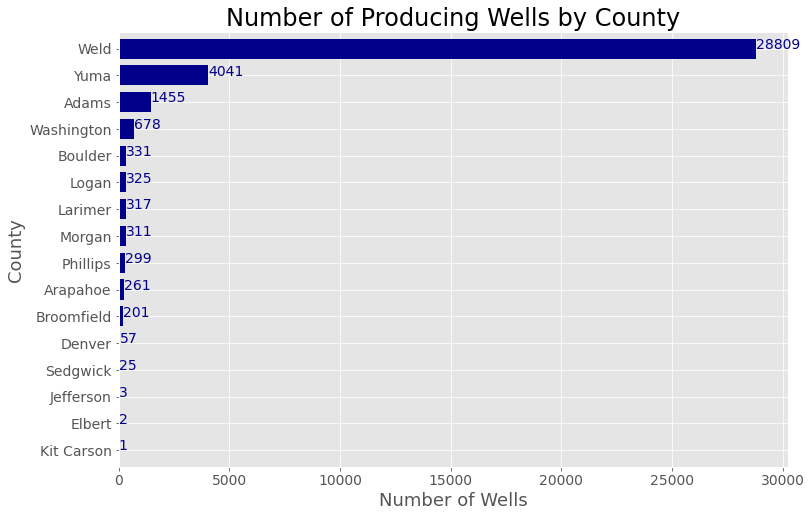

In [98]:
#Univariate analysis
# 1 # of Wells by County

# Rank based on the start dates and rank them in ascending order so that rank = 1 corresponds to the first observed start date; top option gives low rank to Nans (the non-producers)
#rollup_prodhead_final['prod_order_rank'] = rollup_prodhead_final.groupby("API")["Start"].rank(method="first", ascending=True,na_option='top')
#rollup_prodhead_final.info()

#UniqueApis = rollup_prodhead_final[rollup_prodhead_final['prod_order_rank'] == 1]
#UniqueApis.info() #37116
#UniqueApis.head()

#UniqueAPI_County = UniqueApis.groupby('API_County')['API'].count().sort_values().tail(16) #(16 counties - total of 37116 wells)
#countycodes = [123,125,1,121,13,75,69,87,95,5,14,31,115,59,39,63]
print(UniqueApis.groupby('API_County')['API'].count().sort_values().tail(16))# #(16 counties - total of 37116 wells)

%matplotlib inline
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(12,8))

countylabels = ['Kit Carson','Elbert','Jefferson','Sedgwick','Denver','Broomfield','Arapahoe','Phillips','Morgan','Larimer','Logan','Boulder','Washington','Adams','Yuma','Weld']
UniqueApis.groupby('API_County')['API'].count().sort_values().tail(16).plot(kind='barh',title="Number of Producing Wells by County", fontsize = 14, width = .75, color = '#00008B' )
ax.title.set_size(24)
plt.ylabel('County', fontsize = 18)
plt.yticks(np.arange(16), labels = countylabels)
plt.xlabel('Number of Wells', fontsize = 18)
for i, v in enumerate(UniqueAPI_County):
    ax.text(v, i, str(v), color='#00008B', fontsize = 14)
plt.show()

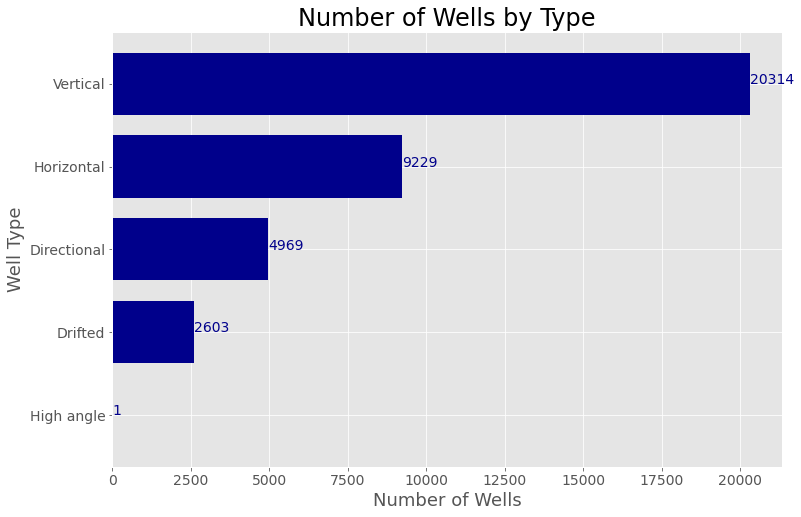

In [97]:
#Univariate analysis
# 2 # of Wells by Well Type
UniqueAPI_WType = UniqueApis.groupby('well_type_cat')['API'].count().sort_values() #(5 types total of 37116 wells)

#%matplotlib inline
fig, ax = plt.subplots(figsize=(12,8))

UniqueApis.groupby('well_type_cat')['API'].count().sort_values().plot(kind='barh',title="Number of Wells by Type", fontsize = 14, width = .75, color = '#00008B')
plt.ylabel('Well Type', fontsize = 18)
ax.title.set_size(24)
plt.xlabel('Number of Wells', fontsize = 18)
for i, v in enumerate(UniqueAPI_WType):
    ax.text(v, i, str(v), color='#00008B', fontsize = 14)
plt.show()

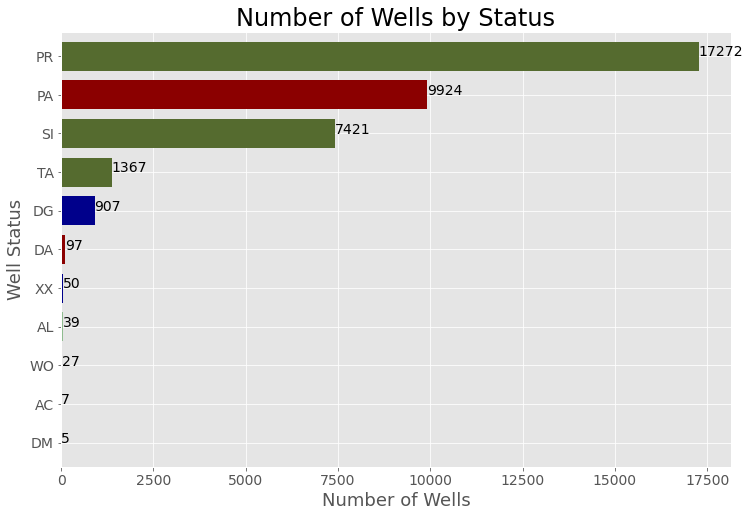

In [96]:
# 3 # of Wells by Status

UniqueAPI_Status = UniqueApis.groupby('Facil_Stat')['API'].count().sort_values(ascending=True) #11 types total of 37116 wells - IJs have been excluded)

# Plot the results
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,8))

UniqueApis.groupby('Facil_Stat')['API'].count().sort_values().tail(12).plot(kind='barh',title="Number of Wells by Status", fontsize = 14, width = .75, color = ['#556B2F','#00008B','#556B2F','#8FBC8F','#00008B','#8B0000', '#00008B','#556B2F','#556B2F','#8B0000', '#556B2F'])
ax.title.set_size(24)
plt.ylabel('Well Status',  fontsize = 18)
plt.xlabel('Number of Wells', fontsize = 18)
for i, v in enumerate(UniqueAPI_Status):
    ax.text(v, i, str(v), color= '#000000', fontsize = 14)
plt.show()

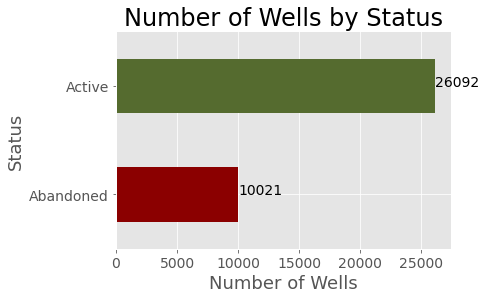

In [119]:
# 4 # of Wells by Ab_Value 
UniqueAPIs_AbVal = UniqueApis.groupby('Ab_Val')['API'].count().sort_values()

%matplotlib inline
fig, ax = plt.subplots(figsize=(6,4))

UniqueApis.groupby('Ab_Val')['API'].count().sort_values().plot(kind='barh',title="Number of Wells by Status", fontsize = 14, color = ['#8B0000', '#556B2F'])
ax.title.set_size(24)
plt.ylabel('Status', fontsize = 18)
plt.yticks(np.arange(2), labels = ['Abandoned', 'Active'])
plt.xlabel('Number of Wells', fontsize = 18)
for i, v in enumerate(UniqueAPIs_AbVal):
    ax.text(v, i, str(v), color= '#000000', fontsize = 14)
plt.show()


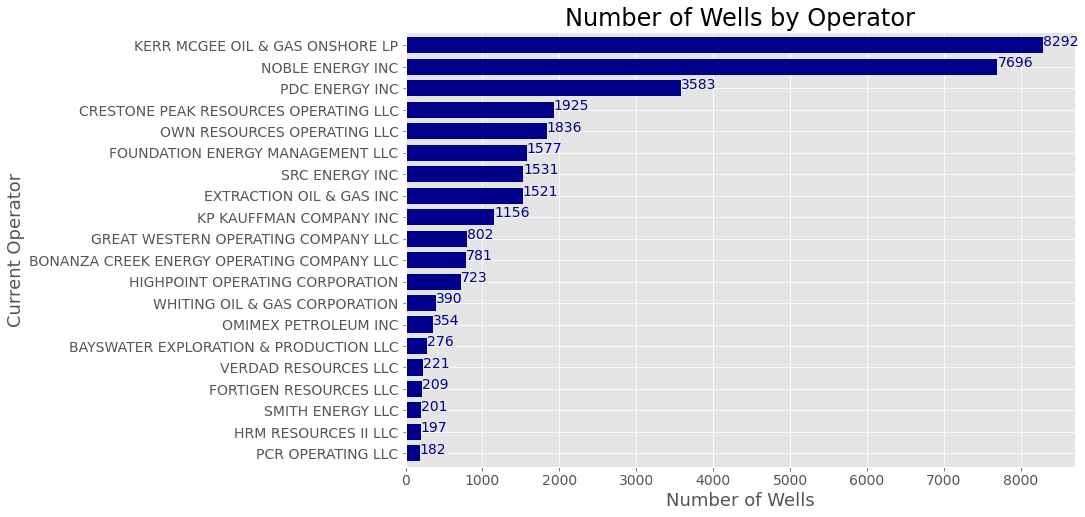

In [114]:
# 5 # of Wells by Operator
UniqueAPI_Op = UniqueApis.groupby('Oper_Cur_Name')['API'].count().sort_values(ascending = True).tail(20)

%matplotlib inline
fig, ax = plt.subplots(figsize=(12,8))

UniqueApis.groupby('Oper_Cur_Name')['API'].count().sort_values().tail(20).plot(kind='barh',title="Number of Wells by Operator", fontsize = 14, width = .75, color = '#00008B')
ax.title.set_size(24)
plt.ylabel('Current Operator', fontsize = 18)
plt.xlabel('Number of Wells', fontsize = 18)
for i, v in enumerate(UniqueAPI_Op):
    ax.text(v, i, str(v), color= '#00008B', fontsize = 14)
plt.show()

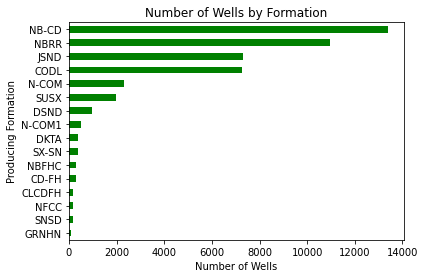

In [0]:
# 6 # of Wells by Formation - No Well Type Distinction - Maybe revise this to exclude N-COM and N-COM1 
#print(rollup_prodhead_final.groupby('fm_code_realloc')['API'].count().sort_values().tail(50))
# Plot the results
%matplotlib inline
rollup_prodhead_final.groupby('fm_code_realloc')['API'].count().sort_values(ascending=True).tail(16).plot(kind='barh',title="Number of Wells by Formation", color = 'green')
plt.ylabel('Producing Formation')
plt.xlabel('Number of Wells')
plt.show()

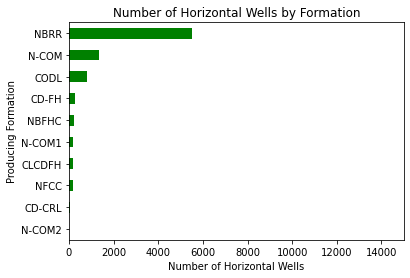

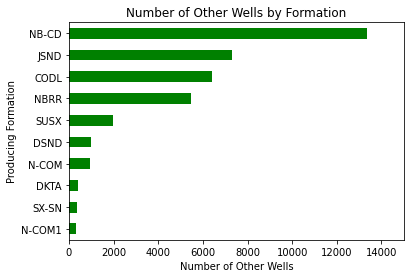

In [0]:
# 7 # of Wells by Formation and Type - hor or vert
onlyhorizontals = rollup_prodhead_final[rollup_prodhead_final['well_type_cat2'] == 'Horizontal']
onlyverticals = rollup_prodhead_final[rollup_prodhead_final['well_type_cat2'] == 'Non-Horizontal']

# Plot the results
%matplotlib inline
onlyhorizontals.groupby('fm_code_realloc')['API'].count().sort_values(ascending=True).tail(10).plot(kind='barh',title="Number of Horizontal Wells by Formation", color = 'green')
plt.ylabel('Producing Formation')
plt.xlabel('Number of Horizontal Wells')
plt.xlim(0,15000)
plt.show()
onlyverticals.groupby('fm_code_realloc')['API'].count().sort_values(ascending=True).tail(10).plot(kind='barh',title="Number of Other Wells by Formation", color = 'green')
plt.ylabel('Producing Formation')
plt.xlabel('Number of Other Wells')
plt.xlim(0,15000)
plt.show()

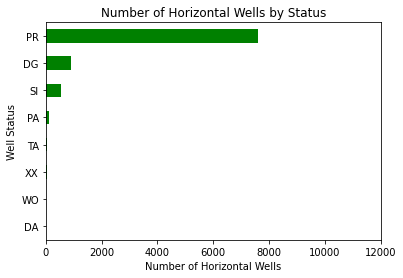

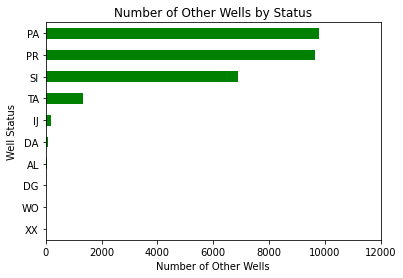

In [0]:
# 8 # of Wells by Status and Well Type
onlyhorizontals = UniqueApis[UniqueApis['well_type_cat2'] == 'Horizontal']
onlyverticals = UniqueApis[UniqueApis['well_type_cat2'] == 'Non-Horizontal']
# Plot the results
%matplotlib inline
onlyhorizontals.groupby('Facil_Stat')['API'].count().sort_values().tail(10).plot(kind='barh',title="Number of Horizontal Wells by Status", color = 'g')
plt.ylabel('Well Status')
plt.xlabel('Number of Horizontal Wells')
plt.xlim(0,12000)
plt.show()
onlyverticals.groupby('Facil_Stat')['API'].count().sort_values().tail(10).plot(kind='barh',title="Number of Other Wells by Status", color = 'g')
plt.ylabel('Well Status')
plt.xlabel('Number of Other Wells')
plt.xlim(0,12000)
plt.show()

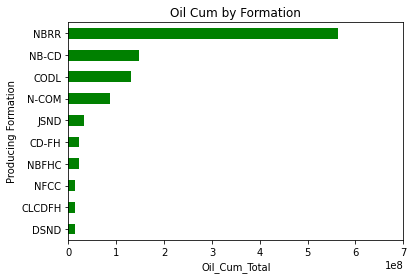

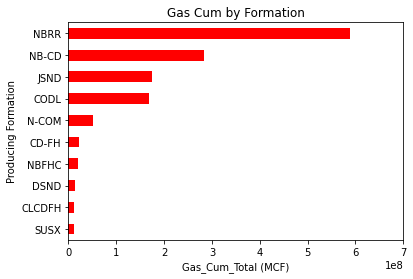

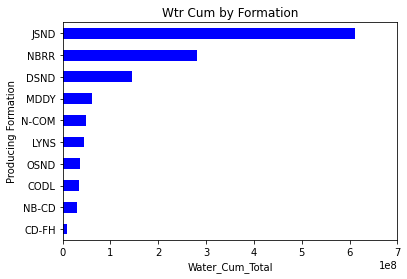

In [0]:
# 9 # Oil, Wtr, Gas Cums by Formation
# First Exclude IJs
limitstatus = rollup_prodhead_final[rollup_prodhead_final['Facil_Stat'].isin(['PR','PA','SI','TA','DG','DA','XX','AL','WO','AC','DM'])]

#print(limitstatus.groupby('fm_code_realloc')['oil_cum'].sum().sort_values().tail(30))
# Plot the results
%matplotlib inline
limitstatus.groupby('fm_code_realloc')['oil_cum'].sum().sort_values().tail(10).plot(kind='barh',title="Oil Cum by Formation", color='g')
plt.ylabel('Producing Formation')
plt.xlabel('Oil_Cum_Total')
plt.xlim(right=700000000)
plt.show()
limitstatus.groupby('fm_code_realloc')['gas_boe_cum'].sum().sort_values().tail(10).plot(kind='barh',title="Gas Cum by Formation", color = 'r')
plt.ylabel('Producing Formation')
plt.xlabel('Gas_Cum_Total (MCF)')
plt.xlim(right=700000000)
plt.show()
limitstatus.groupby('fm_code_realloc')['wtr_cum'].sum().sort_values().tail(10).plot(kind='barh',title="Wtr Cum by Formation", color = 'b')
plt.ylabel('Producing Formation')
plt.xlabel('Water_Cum_Total')
plt.xlim(right=700000000)
plt.show()

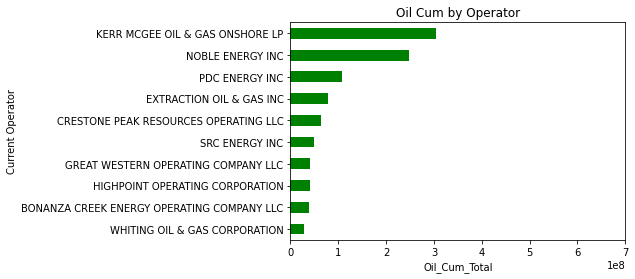

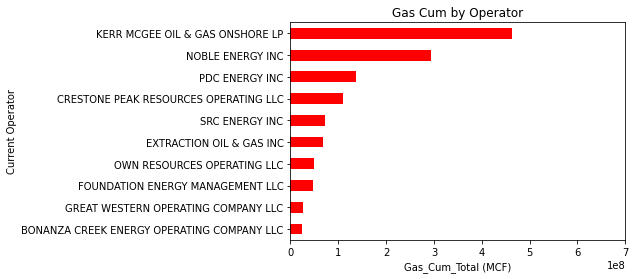

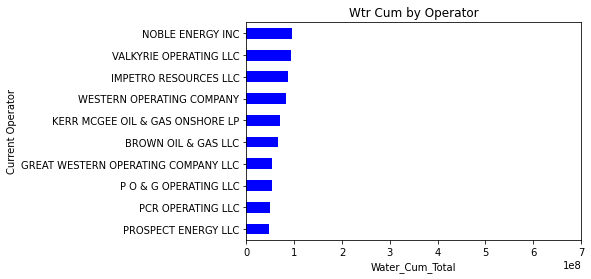

In [0]:
# 10 # Oil, Wtr, Gas Cums by Operator
#print(limitstatus.groupby('Oper_Cur_Name')['oil_cum'].sum().sort_values().tail(30))
%matplotlib inline
limitstatus.groupby('Oper_Cur_Name')['oil_cum'].sum().sort_values().tail(10).plot(kind='barh',title="Oil Cum by Operator", color='g')
plt.ylabel('Current Operator')
plt.xlabel('Oil_Cum_Total')
plt.xlim(right=700000000)
plt.show()
limitstatus.groupby('Oper_Cur_Name')['gas_boe_cum'].sum().sort_values().tail(10).plot(kind='barh',title="Gas Cum by Operator", color = 'r')
plt.ylabel('Current Operator')
plt.xlabel('Gas_Cum_Total (MCF)')
plt.xlim(right=700000000)
plt.show()
limitstatus.groupby('Oper_Cur_Name')['wtr_cum'].sum().sort_values().tail(10).plot(kind='barh',title="Wtr Cum by Operator", color = 'b')
plt.ylabel('Current Operator')
plt.xlabel('Water_Cum_Total')
plt.xlim(right=700000000)
plt.show()

ERROR! Session/line number was not unique in database. History logging moved to new session 62


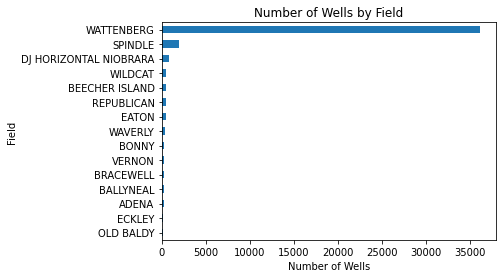

In [0]:
#11 Number of Wells by Field Name - limit number of fields to top 15

#print(UniqueApis.groupby('Field_Name')['API'].count().sort_values().tail(15))
#limitfields = rollup_prodhead_final[rollup_prodhead_final['Field_Name'].isin(['WATTENBERG','SPINDLE','DJ HORIZONTAL NIOBRARA','WILDCAT','BEECHER ISLAND','REPUBLICAN','EATON','WAVERLY',\
 #                                                                                'BONNY','VERNON','BALLYNEAL','ADENA','ECKLEY','OLD BALDY','BRACEWELL'])]
#%matplotlib inline
limitfields.groupby('Field_Name')['API'].count().sort_values().plot(kind='barh',title="Number of Wells by Field")
plt.ylabel('Field')
plt.xlabel('Number of Wells')
plt.show()

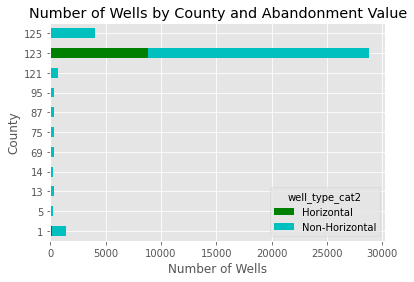

In [162]:
# Begin Bivariate Analysis - stacked bar charts
# 1 - County and Well Type By # of Wells - Grouped into just horizontal and non horizontal categories
# limit counties shown to top 10
limitcos = UniqueApis[UniqueApis['API_County'].isin([123,125,1,121,75,69,87,13,95,5,14])]
#print(limitcos.groupby(['well_type_cat2','API_County'])['API_County'].count().sort_values(ascending=False))
%matplotlib inline
limitcos.groupby(['well_type_cat2','API_County'])['API_County'].count().unstack('well_type_cat2').plot(kind='barh',stacked = True, title="Number of Wells by County and Abandonment Value", color = ['g','c'])
plt.ylabel('County')
plt.xlabel('Number of Wells')
plt.show()

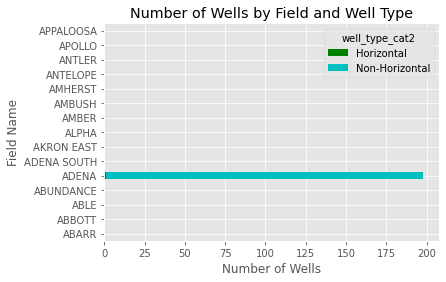

In [168]:
# 2 - Field and Well Type By # of Wells - Grouped into just horizontal and non horizontal categories
# and field (top 15)
limitfield = UniqueApis.loc[UniqueApis['Field_Name'].isin(['WATTENBERG','SPINDLE','DJ HORIZONTAL NIOBRARA','WILDCAT','BEECHER ISLAND','REPUBLICAN','EATON','WAVERLY',\
                                           'BONNY','VERNON','BALLYNEAL','ADENA','ECKLEY','OLD BALDY','BRACEWELL'])]
#fieldlist = limitfield['Field_Name'].unique()
#fieldlstseries = pd.Series(fieldlist)
#fieldlstseries.shape #15

#print(limitfield.groupby(['well_type_cat2','Field_Name'])['well_type_cat2'].count().sort_values(ascending=False))
#%matplotlib inline
limitfield.groupby(['well_type_cat2','Field_Name'])['Field_Name'].count().unstack('well_type_cat2').head(15).plot(kind='barh',stacked = True, title="Number of Wells by Field and Well Type", color = ['g','c'])
plt.ylabel('Field Name')
plt.xlabel('Number of Wells')
plt.show()

Ab_Val  well_type_cat2
0.0     Non-Horizontal    17906
1.0     Non-Horizontal     9901
0.0     Horizontal         8186
1.0     Horizontal          120
Name: well_type_cat2, dtype: int64


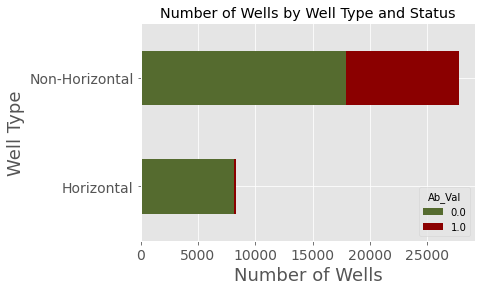

In [121]:
# 3 - Ab Value and Well Type By # of Wells - Grouped into just horizontal and non horizontal categories

UniqueApis_TypeStatus = UniqueApis.groupby(['Ab_Val','well_type_cat2'])['well_type_cat2'].count().sort_values(ascending=False)
print(UniqueApis_TypeStatus)

#%matplotlib inline
UniqueApis.groupby(['Ab_Val','well_type_cat2'])['well_type_cat2'].count().unstack('Ab_Val').plot(kind='barh',stacked = True, title="Number of Wells by Well Type and Status", fontsize = 14, color = ['#556B2F','#8B0000'])
ax.title.set_size(24)
plt.ylabel('Well Type', fontsize = 18)
plt.xlabel('Number of Wells',  fontsize = 18)
plt.show()


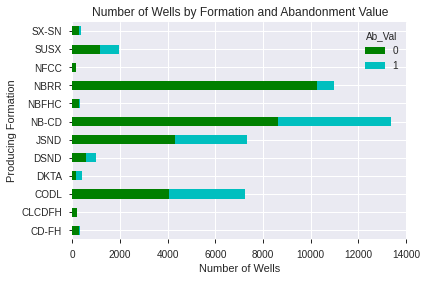

In [0]:
# 4 - Ab Value and Form2 By # of Wells
#print(rollup_prodhead_final.groupby('fm_code_realloc')['API'].count().sort_values())
limitfms = rollup_prodhead_final[rollup_prodhead_final['fm_code_realloc'].isin(['NB-CD','NBRR','CODL','JSND','SUSX','DSND','DKTA','SX-SN','NBFHC','CD-FH','CLCDFH','NFCC'])]
#print(limitfms.groupby(['Ab_Val','fm_code_realloc'])['fm_code_realloc'].count().sort_values(ascending=False).unstack('Ab_Val'))
#%matplotlib inline
limitfms.groupby(['Ab_Val','fm_code_realloc'])['fm_code_realloc'].count().sort_values(ascending=False).unstack('Ab_Val').plot(kind='barh',stacked = True, title="Number of Wells by Formation and Abandonment Value",color = ['g','c'])
plt.ylabel('Producing Formation')
plt.xlabel('Number of Wells')
plt.show()

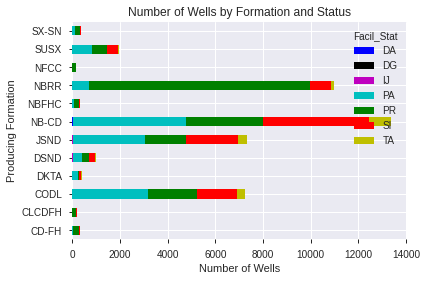

In [0]:
# 5 - Status and Form2 By # of Wells

limitfmsstat = rollup_prodhead_final[rollup_prodhead_final['fm_code_realloc'].isin(['NB-CD','NBRR','CODL','JSND','SUSX','DSND','DKTA','SX-SN','NBFHC','CD-FH','CLCDFH','NFCC'])][rollup_prodhead_final['Facil_Stat'].isin(['PR','PA','SI','TA','DG','TA','DA','IJ'])]
#print(limitfmsstat.groupby(['Facil_Stat','fm_code_realloc'])['fm_code_realloc'].count().sort_values(ascending=False).unstack('Facil_Stat'))
%matplotlib inline
limitfmsstat.groupby(['Facil_Stat','fm_code_realloc'])['fm_code_realloc'].count().sort_values(ascending=False).unstack('Facil_Stat').plot(kind='barh',stacked = True, title="Number of Wells by Formation and Status", color = ['b','k','m','c','g','r','y'])
plt.ylabel('Producing Formation')
plt.xlabel('Number of Wells')
plt.show()

Text(0.5, 0, 'Number of Wells')

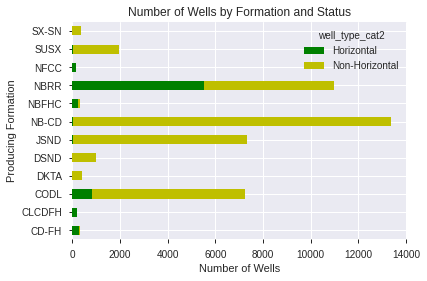

In [0]:
# 6 - Well Type and Form2 By # of Wells

limitfms = rollup_prodhead_final[rollup_prodhead_final['fm_code_realloc'].isin(['NB-CD','NBRR','CODL','JSND','SUSX','DSND','DKTA','SX-SN','NBFHC','CD-FH','CLCDFH','NFCC'])]
#print(limitfms.groupby(['well_type_cat2','Form2'])['Form2'].count().sort_values(ascending=False).unstack('well_type_cat2'))
%matplotlib inline
limitfms.groupby(['well_type_cat2','fm_code_realloc'])['fm_code_realloc'].count().sort_values(ascending=False).unstack('well_type_cat2').plot(kind='barh',stacked = True, title="Number of Wells by Formation and Status", color = ['g','y'])
plt.ylabel('Producing Formation')
plt.xlabel('Number of Wells')
#plt.show()

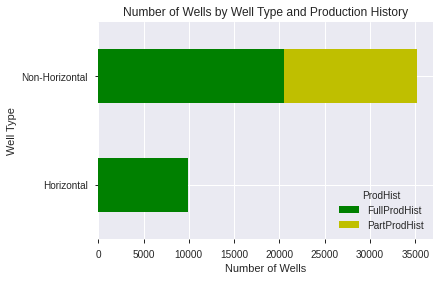

In [0]:
#  7- Well Type and Full or Partial Prod History By # of Wells

#print(rollup_prodhead_final.groupby(['ProdHist','well_type_cat2'])['well_type_cat2'].count().sort_values(ascending=False).unstack('ProdHist'))
%matplotlib inline
rollup_prodhead_final.groupby(['ProdHist','well_type_cat2'])['well_type_cat2'].count().sort_values(ascending=False).unstack('ProdHist').plot(kind='barh',stacked = True, title="Number of Wells by Well Type and Production History", color = ['g','y'])
plt.ylabel('Well Type')
plt.xlabel('Number of Wells')
plt.show()

In [0]:
# Start analysis with ggplot 
# We run this to suppress various deprecation warnings from plotnine - keeps our notebook cleaner
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

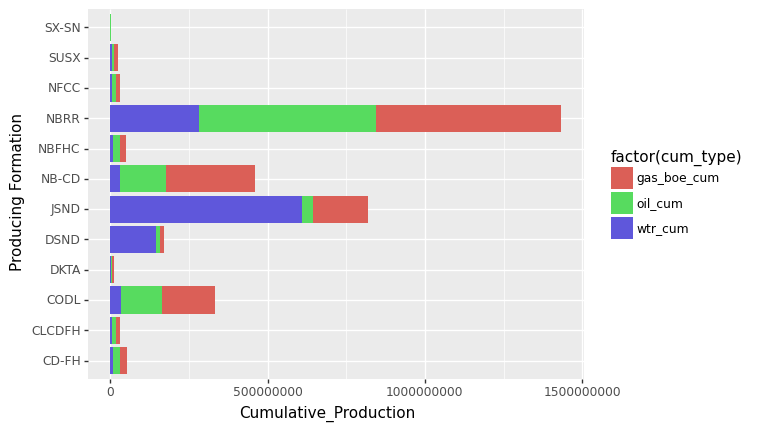

<ggplot: (-9223363256555424063)>

In [0]:
# 8 - Stacked production by formation (oil, water, gas) 
## Stacked bar charts
# Need to reshape so that we can use as aesthetics

limitfms = limitstatus[limitstatus['fm_code_realloc'].isin(['NB-CD','NBRR','CODL','JSND','SUSX','DSND','DKTA','SX-SN','NBFHC','CD-FH','CLCDFH','NFCC'])]
limitfms_melted = limitfms[['fm_code_realloc', 'wtr_cum', 'oil_cum', 'gas_boe_cum']].melt(id_vars=['fm_code_realloc'],var_name = 'cum_type',value_name = 'cum')
#limitfms_melted.head()

ggplot(limitfms_melted, aes(y ='cum', x = 'fm_code_realloc', fill = 'factor(cum_type)')) + geom_bar(stat = 'identity') + xlab('Producing Formation') + ylab('Cumulative_Production') + coord_flip()


/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:433: PlotnineWarning: position_stack : Removed 3066 rows containing missing values.
  data = self.position.setup_data(self.data, params)


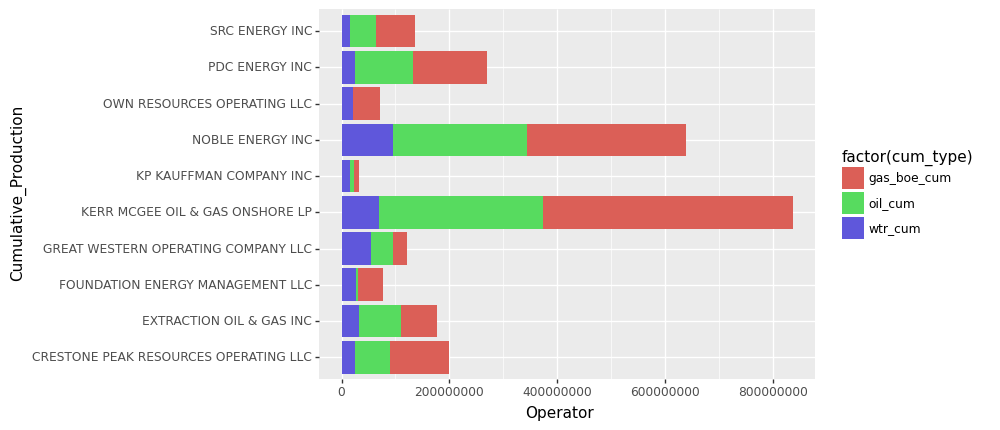

<ggplot: (8780296868872)>

In [0]:
# 9 - Stacked production by operator (Top10)
limitops = limitstatus[limitstatus['Oper_Cur_Num'].isin(['47120','100322','69175','10633','10699','10112','10311','10459','46290','10110'])]
limitops_melted = limitops[['Oper_Cur_Name', 'wtr_cum', 'oil_cum', 'gas_boe_cum']].melt(id_vars=['Oper_Cur_Name'],var_name = 'cum_type',value_name = 'cum')
#limitops_melted.head()

ggplot(limitops_melted, aes(y ='cum', x = 'Oper_Cur_Name', fill = 'factor(cum_type)')) + geom_bar(stat = 'identity') + ylab('Operator') + xlab('Cumulative_Production') + coord_flip()


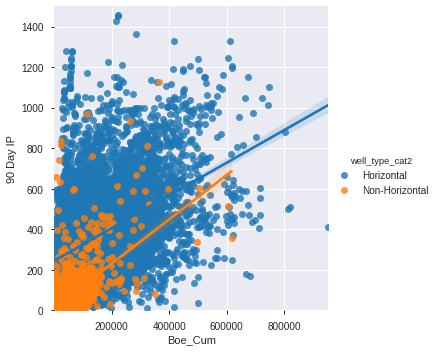

In [0]:
# Begin bivariate analysis with continuous variables - scatter plotting using seaborn - production
# Issue here is that many non-horizontal wells actual IP is prior to production window - need to exclude partprodhist category and remove cums and IPs = 0
# 1 - BOE Cum vs 90 Day IP color-coded by well_type_cat
limitfullhist = rollup_prodhead_final[rollup_prodhead_final['ProdHist'] == 'FullProdHist'][rollup_prodhead_final['IP_three_mo'] > 0][rollup_prodhead_final['boe_cum'] > 0]
sns.lmplot(x = 'boe_cum', y = 'IP_three_mo', data=limitfullhist, hue = 'well_type_cat2')
plt.ylabel('90 Day IP')
plt.xlabel('Boe_Cum')
plt.ylim(0,1500)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


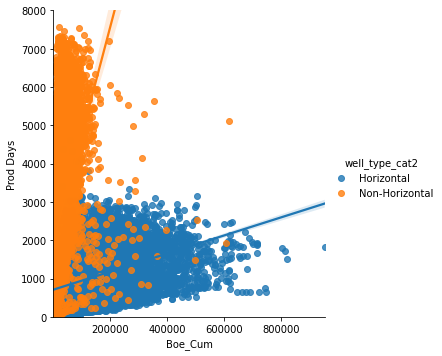

In [0]:
# Issue here is that many non-horizontal wells actual IP is prior to production window - need to exclude partprodhist category and remove cums and IPs = 0
# 1 - Cum vs prod days  color-coded by prodhistratio
limitfullhist = rollup_prodhead_final[rollup_prodhead_final['ProdHist'] == 'FullProdHist'][rollup_prodhead_final['boe_cum'] > 0]
limitfullhist['prod_days_int'] = pd.to_numeric(limitfullhist['prod_days'].dt.days)
limitfullhist['prod_days_int'].idxmax()
limitfullhist.sort_values(by='prod_days',ascending=False).head(10)

sns.lmplot(x = 'boe_cum', y = 'prod_days_int', data=limitfullhist, hue = 'well_type_cat2')
plt.ylabel('Prod Days')
plt.xlabel('Boe_Cum')
plt.ylim(0,8000)
plt.show()

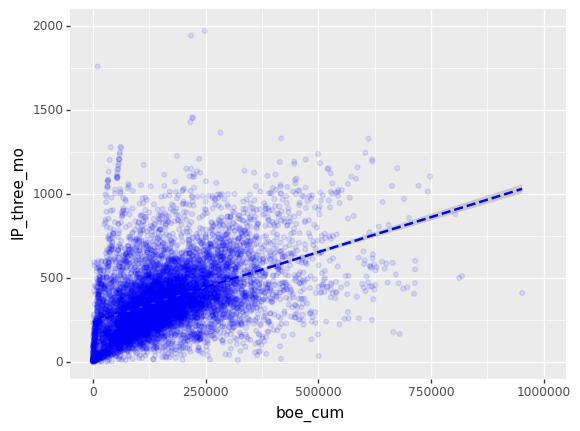

<ggplot: (8779692611336)>

In [0]:
# Same as above using ggplot 
# 1 - Boe Cum vs 90 Day IP  - Full Prod Hist only - Horizontals - exclude partial prod histories and boes, ips = 0
limitwelltypehorfullhist = rollup_prodhead_final[rollup_prodhead_final['well_type_cat2'] == 'Horizontal'][rollup_prodhead_final['ProdHist'] == 'FullProdHist']\
[rollup_prodhead_final['IP_three_mo'] > 0][rollup_prodhead_final['boe_cum'] > 0]

ggplot(limitwelltypehorfullhist, aes(x = 'boe_cum', y = 'IP_three_mo')) + geom_point(alpha = .1, color='blue') + xlim(0,1000000) + ylim(0,2000) + geom_smooth(color = 'blue', linetype='dashed')


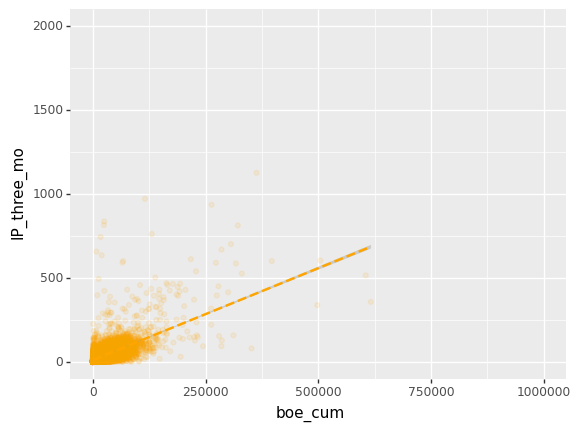

<ggplot: (8779721843709)>

In [0]:
# 1 - Boe Cum vs 90 Day IP  - Full Prod Hist only - Verticals - exclude partial prod histories and ips = 0

limitwelltypevertfullhist = rollup_prodhead_final[rollup_prodhead_final['well_type_cat2'] == 'Non-Horizontal'][rollup_prodhead_final['ProdHist'] == 'FullProdHist']\
[rollup_prodhead_final['IP_three_mo'] > 0][rollup_prodhead_final['boe_cum'] > 0]

ggplot(limitwelltypevertfullhist, aes(x = 'boe_cum', y = 'IP_three_mo')) + geom_point(alpha = .1, color='orange') + xlim(0,1000000) + ylim(0,2000) + geom_smooth(color = 'orange', linetype='dashed')

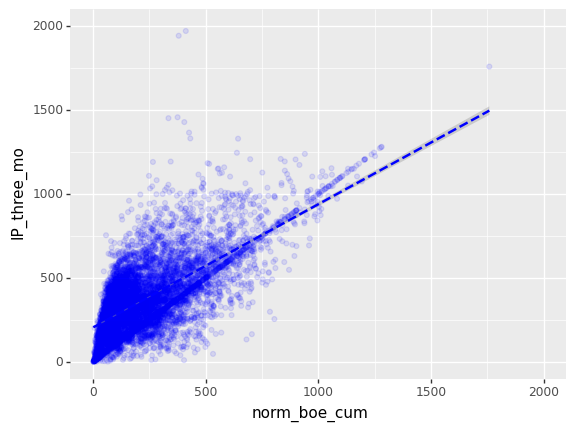

<ggplot: (8779714634402)>

In [0]:
# Same as above using ggplot 
# 2 - Norm Boe Cum vs 90 Day IP  - Full Prod Hist only - Horizontals - exclude partial prod histories and boes, ips = 0
limitwelltypehorfullhist = rollup_prodhead_final[rollup_prodhead_final['well_type_cat2'] == 'Horizontal'][rollup_prodhead_final['ProdHist'] == 'FullProdHist']\
[rollup_prodhead_final['IP_three_mo'] > 0][rollup_prodhead_final['norm_boe_cum'] > 0]

ggplot(limitwelltypehorfullhist, aes(x = 'norm_boe_cum', y = 'IP_three_mo')) + geom_point(alpha = .1, color='blue') + xlim(0,2000) + ylim(0,2000) + geom_smooth(color = 'blue', linetype='dashed')

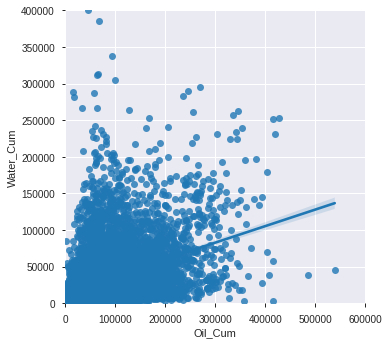

In [0]:
# 2 - Oil Cum vs Water Cum for Horizontals Only
sns.lmplot(x = 'oil_cum', y = 'wtr_cum', data=rollup_prodhead_final[rollup_prodhead_final['well_type_cat2'] == 'Horizontal'])
plt.ylabel('Water_Cum')
plt.xlabel('Oil_Cum')
plt.ylim(0,400000)
plt.xlim(0,600000)
plt.show()
#rollup_prodhead_final['gas_mcf_cum'].idxmax()
#rollup_prodhead_finalp.iloc[8360:8365]
#allproddf.drop(116971,inplace=True)

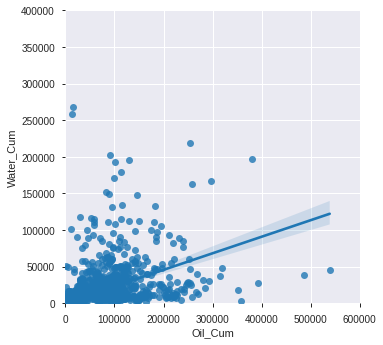

In [0]:
# 3 - Oil Cum vs Water Cum for NBRR Only
sns.lmplot(x = 'oil_cum', y = 'wtr_cum', data=rollup_prodhead_final[rollup_prodhead_final['fm_code_realloc'] == 'CODL'])
plt.ylabel('Water_Cum')
plt.xlabel('Oil_Cum')
plt.ylim(0,400000)
plt.xlim(0,600000)
plt.show()

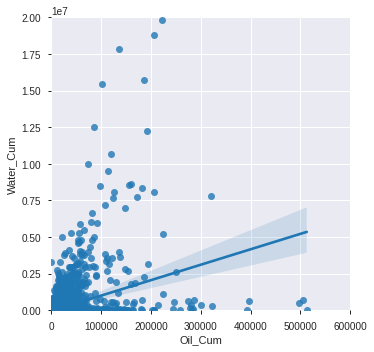

In [0]:
# 4 - Oil Cum vs Water Cum for NonHorizontals Only
sns.lmplot(x = 'oil_cum', y = 'wtr_cum', data=rollup_prodhead_final[rollup_prodhead_final['well_type_cat2'] == 'Non-Horizontal'])
plt.ylabel('Water_Cum')
plt.xlabel('Oil_Cum')
plt.ylim(0,20000000)
plt.xlim(0,600000)
plt.show()

/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_boxplot : Removed 1 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


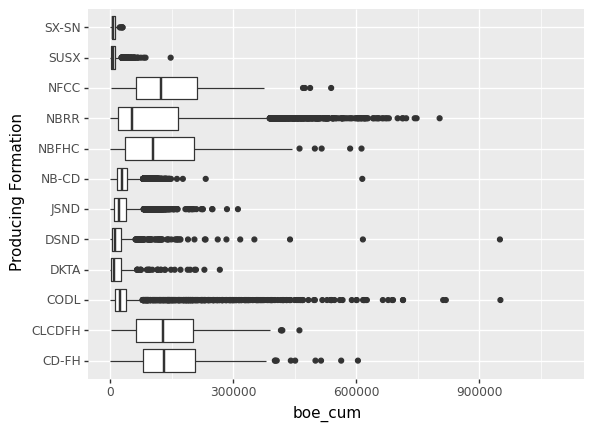

<ggplot: (-9223363256555365965)>

In [0]:
# Begin bivariate analysis with continuous variables - boxplots
# using ggplot
# 1 - Boe Cums by Formation 
limitfms = rollup_prodhead_final[rollup_prodhead_final['fm_code_realloc'].isin(['NB-CD','NBRR','CODL','JSND','SUSX','DSND','DKTA','SX-SN','NBFHC','CD-FH','CLCDFH','NFCC'])]
ggplot(limitfms, aes(x ='fm_code_realloc', y = 'boe_cum')) + geom_boxplot() + xlab('Producing Formation') + ylim(0,1100000) + coord_flip()



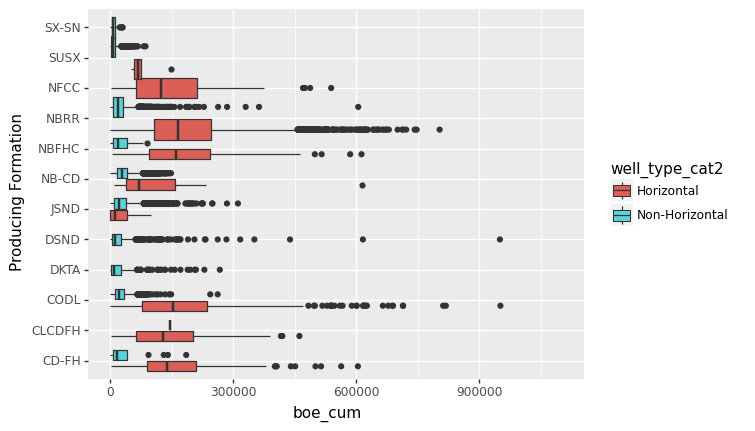

<ggplot: (-9223363257141889746)>

In [0]:
#Subdivide by well_type_cat
# 2 - Boe Cums by Formation 
limitfms = rollup_prodhead_final[rollup_prodhead_final['fm_code_realloc'].isin(['NB-CD','NBRR','CODL','JSND','SUSX','DSND','DKTA','SX-SN','NBFHC','CD-FH','CLCDFH','NFCC'])]
ggplot(limitfms, aes(x ='fm_code_realloc', y = 'boe_cum', fill = 'well_type_cat2')) + geom_boxplot() + xlab('Producing Formation') + ylim(0,1100000) + coord_flip()

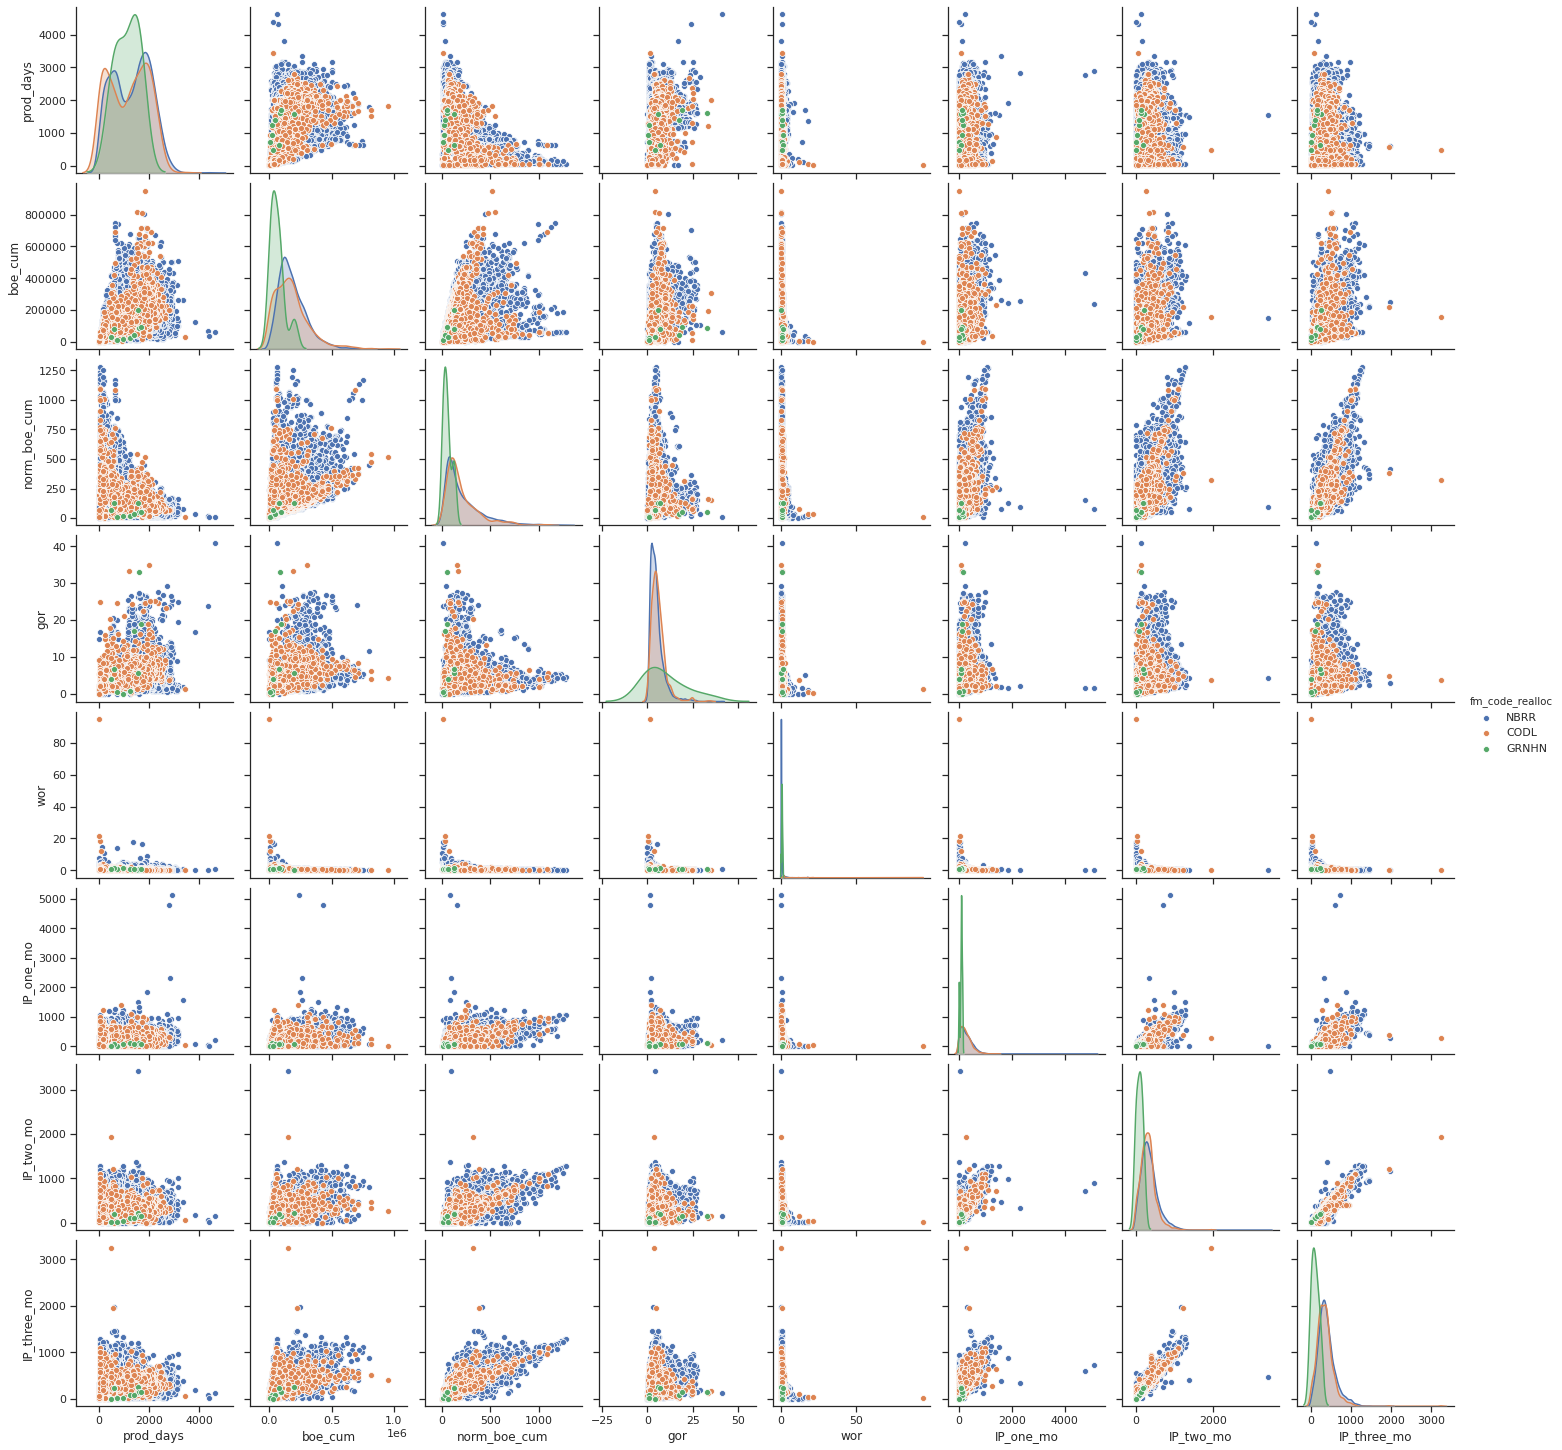

In [0]:
# Scatter matrix plots
# Contrast horizontal production by fm
#limitwelltypehorfmsfullhist = limitwelltypehorfullhist[limitwelltypehorfullhist['fm_code_realloc'].isin(['NBRR','CODL','GRNHN'])]
#prodcolumns = ('fm_code_realloc', 'prod_days', 'boe_cum', 'norm_boe_cum', 'gor', 'wor','IP_one_mo', 'IP_two_mo', 'IP_three_mo')
#horprod = pd.DataFrame(limitwelltypehorfmsfullhist, columns = prodcolumns)
#horprod['prod_days'] = horprod['prod_days'].dt.days
#horprod.info()

sns.set(style="ticks")

sns.pairplot(horprod, hue="fm_code_realloc")

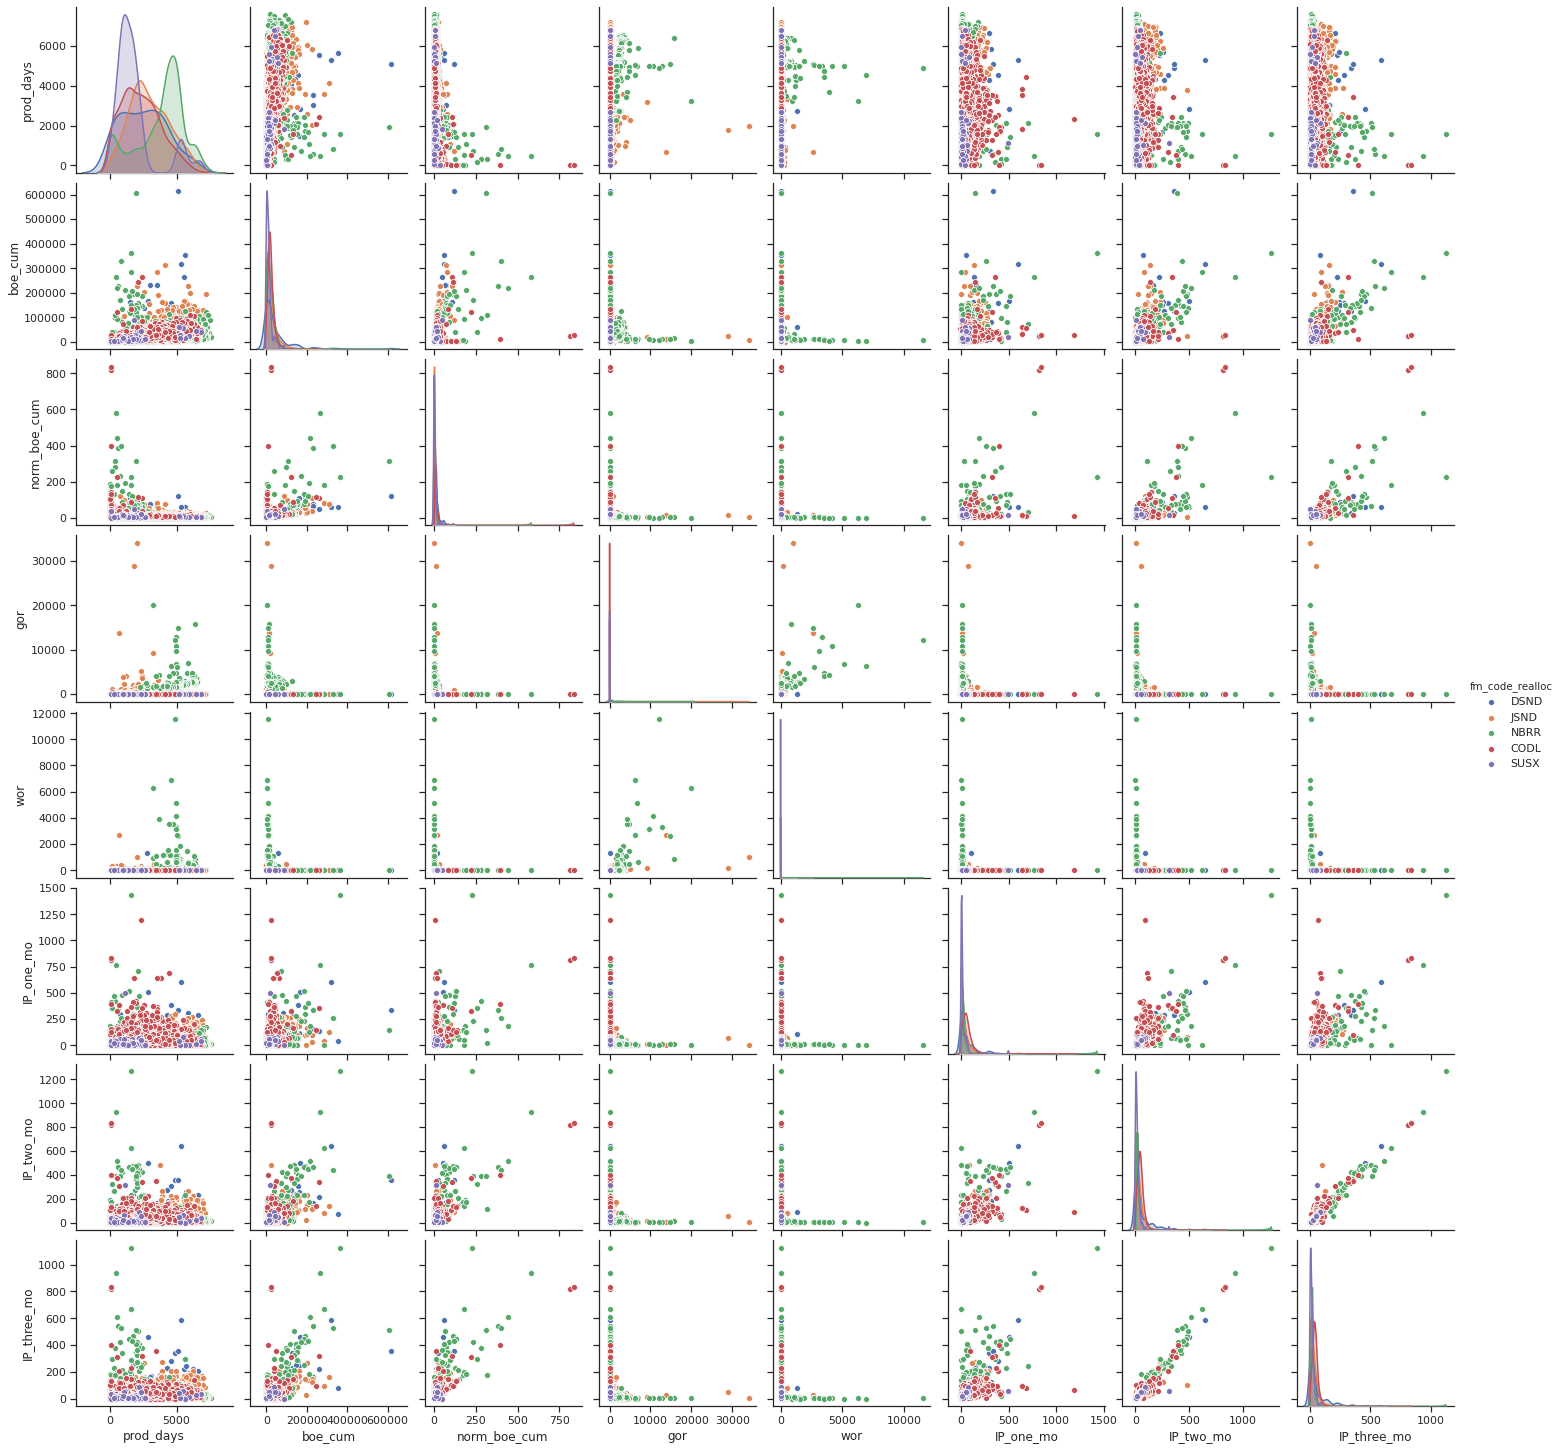

In [0]:
# 2 Contrast vertical production by fm

limitwelltypevertfullhist = rollup_prodhead_final[rollup_prodhead_final['well_type_cat2'] == 'Non-Horizontal'][rollup_prodhead_final['ProdHist'] == 'FullProdHist']\
[rollup_prodhead_final['IP_three_mo'] > 0][rollup_prodhead_final['boe_cum'] > 0]
limitwelltypevertfmsfullhist = limitwelltypevertfullhist[limitwelltypevertfullhist['fm_code_realloc'].isin(['NBRR','CODL','JSND','DSND','SUSX'])]

prodcolumns = ('fm_code_realloc', 'prod_days', 'boe_cum', 'norm_boe_cum', 'gor', 'wor','IP_one_mo', 'IP_two_mo', 'IP_three_mo')
vertprod = pd.DataFrame(limitwelltypevertfmsfullhist, columns = prodcolumns)
vertprod['prod_days'] = vertprod['prod_days'].dt.days

sns.set(style="ticks")

sns.pairplot(vertprod, hue="fm_code_realloc")

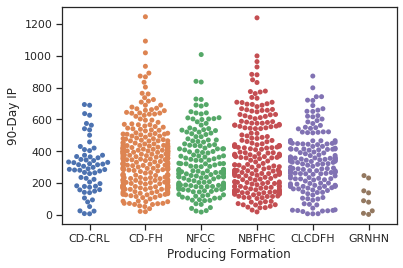

In [0]:
# Try some beeswarms - horizontal production IPs by formation
limitwelltypehorfmsfullhist = limitwelltypehorfullhist[limitwelltypehorfullhist['fm_code_realloc'].isin(['GRNHN','CD-FH','NBFHC','CLCDFH','NFCC','CD-CRL'])]
sns.swarmplot(x = 'fm_code_realloc', y = 'IP_three_mo', data=limitwelltypehorfmsfullhist )
plt.xlabel('Producing Formation')
plt.ylabel('90-Day IP')
plt.show()

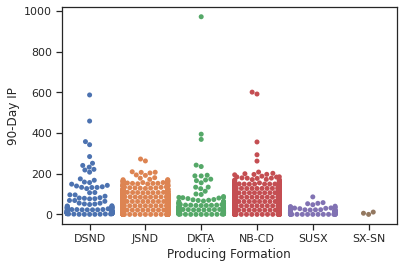

In [0]:
# Vertical production IPs by formation

limitwelltypevertfmsfullhist = limitwelltypevertfullhist[limitwelltypevertfullhist['fm_code_realloc'].isin(['NB-CD','JSND','DSND','DKTA','SUSX','SX-SN'])]

sns.swarmplot(x = 'fm_code_realloc', y = 'IP_three_mo', data=limitwelltypevertfmsfullhist)
plt.xlabel('Producing Formation')
plt.ylabel('90-Day IP')
plt.show()

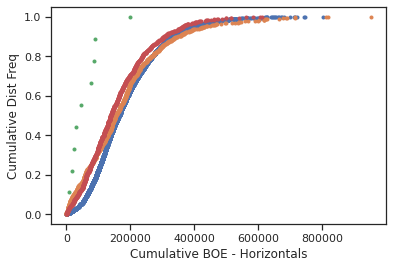

In [0]:
# Plot ECDF of NBRR horizontal production

limitwelltypehorfmsfullhistNBRR = limitwelltypehorfullhist[limitwelltypehorfullhist['fm_code_realloc'].isin(['NBRR'])]
limitwelltypehorfmsfullhistCODL = limitwelltypehorfullhist[limitwelltypehorfullhist['fm_code_realloc'].isin(['CODL'])]
limitwelltypehorfmsfullhistGRNHN = limitwelltypehorfullhist[limitwelltypehorfullhist['fm_code_realloc'].isin(['GRNHN'])]
limitwelltypehorfmsfullhistOTHER = limitwelltypehorfullhist[limitwelltypehorfullhist['fm_code_realloc'].isin(['CD-FH','NBFHC','CLCDFH','NFCC','CD-CRL'])]

def ecdf(data):
  n=len(data)
  x = np.sort(data)
  y = np.arange(1,len(x)+1) / n
  return x,y

xNBRR , yNBRR = ecdf(limitwelltypehorfmsfullhistNBRR['boe_cum'])
xCODL , yCODL = ecdf(limitwelltypehorfmsfullhistCODL['boe_cum'])
xGRNHN , yGRNHN = ecdf(limitwelltypehorfmsfullhistGRNHN['boe_cum'])
xOTHER , yOTHER = ecdf(limitwelltypehorfmsfullhistOTHER['boe_cum'])

plt.plot(xNBRR , yNBRR, marker='.', linestyle='none')
plt.plot(xCODL , yCODL, marker='.',  linestyle='none')
plt.plot(xGRNHN , yGRNHN, marker='.',  linestyle='none')
plt.plot(xOTHER , yOTHER, marker='.',  linestyle='none')
plt.xlabel('Cumulative BOE - Horizontals')
plt.ylabel('Cumulative Dist Freq')
plt.show()

In [0]:
# Use pd.cut to divide horizontal ab-value = 1 by length of time on production